<a href="https://colab.research.google.com/github/neanhim/dz_python/blob/master/DZ_vision_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кратко о модели.
Не смог достичь точности >72-73%. Возможно потому, что не стал использовать большое количество слоёв, так как наступало переобучение и значительно увеличивалось время обучения модели. 

Понравилось использовать вместо 5х5 свертки - две 3х3, а вместо МаксПуллинга - stride 2. Дает примерно такие же результаты.

Как еще бы улучшал модель:

1.   Добавил бы еще фильтров
2.  Добавил бы дропаут (сейчас толку от него не было)
3. Добавил бы пару полносвязных слоёв.



In [184]:
%tensorflow_version 2.x
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

## Загрузка и подготовка датасета

---



In [185]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()
train_x = train_x.astype(np.float32) / 255.
test_x = test_x.astype(np.float32) / 255.
print(train_x.shape, train_x.dtype)

(50000, 32, 32, 3) float32


## Визуализация датасета

(32, 32, 32, 3)


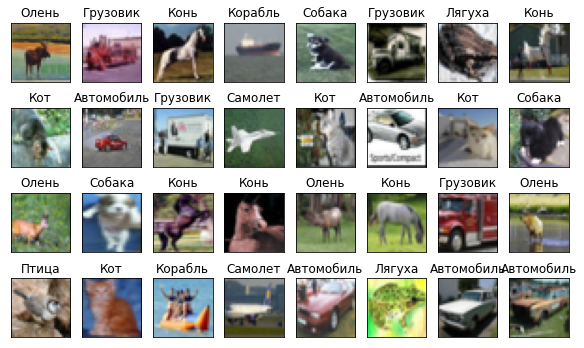

In [186]:
some_samples = train_x[66:98, ...]
some_labels = train_y[66:98, ...]

def label_name(i):
    n = ['Самолет', 'Автомобиль', 'Птица', 'Кот', 'Олень', 'Собака', 'Лягуха', 'Конь', 'Корабль', 'Грузовик']
    return n[int(i)]

print(some_samples.shape)
fig = plt.figure(figsize=(10, 6))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(some_samples[j,:,:,:])
    plt.xticks([]), plt.yticks([])
    plt.title(label_name(int(some_labels[j])))
plt.show()

## Создание модели CNN

In [190]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', strides=(2,2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
NUM_EPOCHS = 5
model.fit(train_x, train_y, epochs=NUM_EPOCHS)
ev = model.evaluate(test_x, test_y)
print(f"Accuracy: {ev[1]} \n Loss: {ev[0]}")

Epoch 1/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5068 - accuracy: 0.4476
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0540 - accuracy: 0.6235
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8608 - accuracy: 0.6934
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7123 - accuracy: 0.7468
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.9696 - accuracy: 0.6981
Accuracy: 0.6980999708175659 
 Loss: 0.9696071147918701


## Функция для инференса и отображения результата предсказания

In [191]:
def test_image(sample):
    
    prediction = model(sample[None, ...])[0]
    ans = np.argmax(prediction)
    
    fig = plt.figure(figsize=(16,5))

    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(sample[:,:,:])
    plt.xticks([]), plt.yticks([])

    ax = fig.add_subplot(1, 2, 2)
    bar_list = ax.bar(np.arange(10), prediction, align='center')
    bar_list[ans].set_color('g')
    ax.set_xticks(np.arange(10))
    ax.set_xticklabels(['Самолет', 'Автомобиль', 'Птица', 'Кот', 'Олень', 'Собака', 'Лягуха', 'Конь', 'Корабль', 'Грузовик'])
    ax.set_xlim([-1, 10])
    ax.grid(True)

    plt.show()
    
    print('Predicted: {}'.format(label_name(ans)))

## Запуск предсказания для случайного изображения




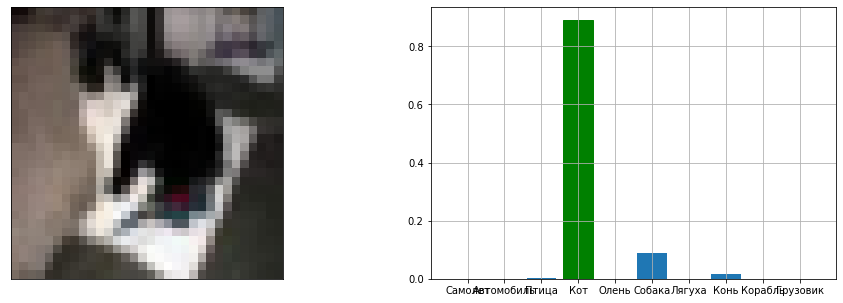

Predicted: Кот
True Answer: Кот


In [193]:
import random
idx = random.randint(656, test_x.shape[0])
sample = test_x[idx, ...]
test_image(sample)

print('True Answer: {}'.format(label_name(test_y[idx])))